In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/21312231/projectecg.mat


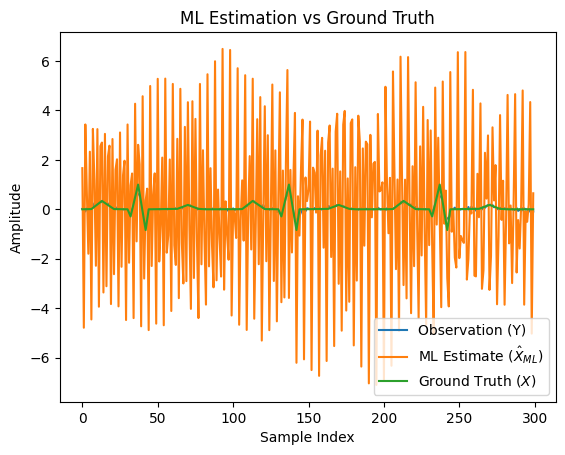

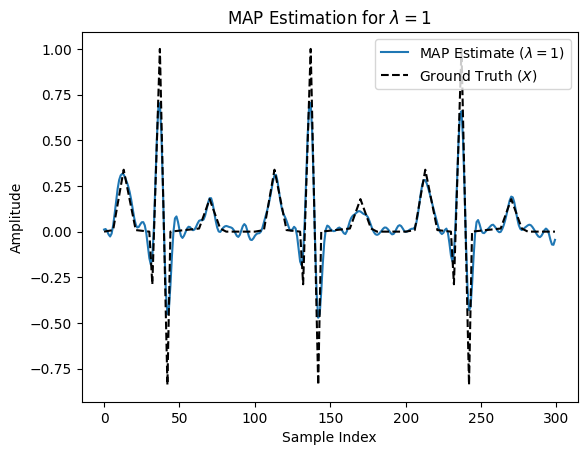

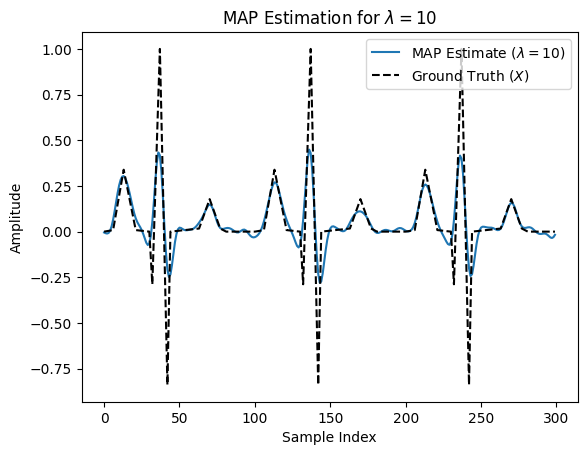

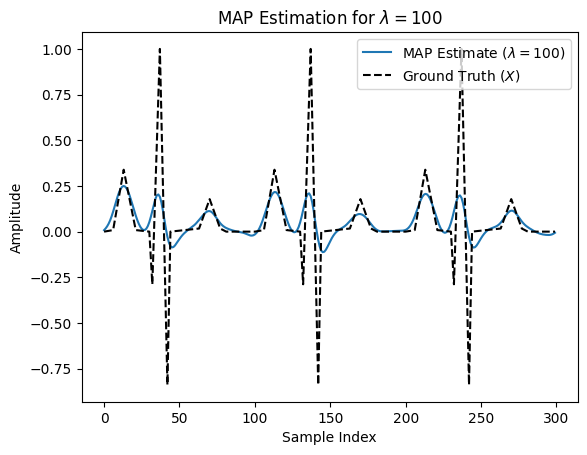

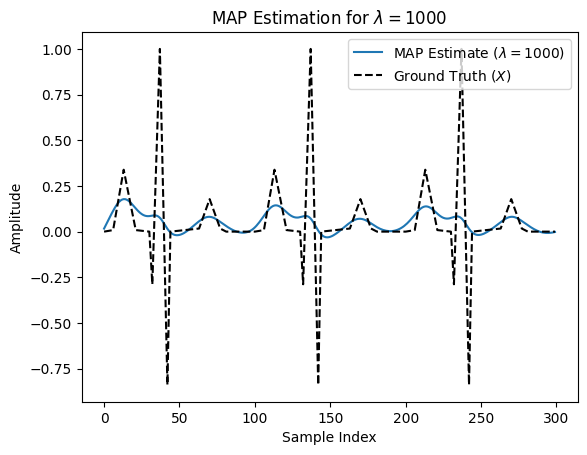

MSE Results:
ML Estimator MSE: 10.807755
MAP Estimator MSE (lambda=1): 0.005245
MAP Estimator MSE (lambda=10): 0.014758
MAP Estimator MSE (lambda=100): 0.026882
MAP Estimator MSE (lambda=1000): 0.034828
      Estimator        MSE
0            ML  10.807755
1     MAP (λ=1)   0.005245
2    MAP (λ=10)   0.014758
3   MAP (λ=100)   0.026882
4  MAP (λ=1000)   0.034828


In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

data = sio.loadmat('/kaggle/input/21312231/projectecg.mat')
H = data['H']  # system matrix
L = data['L']  # tikhonov regularization matrix
Y = data['y'].flatten()  # observation vector
X_ground_truth = data['x'].flatten()  # ground-truth signal

# Ensure matrices are correctly shaped
assert H.shape == (300, 300)
assert L.shape == (300, 300)
assert Y.shape == (300,)
assert X_ground_truth.shape == (300,)

# ML estimation
H_T_H_inv = np.linalg.inv(H.T @ H)
X_ML = H_T_H_inv @ H.T @ Y

plt.figure()
plt.plot(Y, label="Observation (Y)")
plt.plot(X_ML, label="ML Estimate ($\hat{X}_{ML}$)")
plt.plot(X_ground_truth, label="Ground Truth ($X$)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("ML Estimation vs Ground Truth")
plt.legend()
plt.show()

# MAP estimation for different lambda values
lambdas = [1, 10, 100, 1000]
X_MAP = {}

for lambda_val in lambdas:
    lambda_LTL = lambda_val * (L.T @ L)
    X_MAP[lambda_val] = np.linalg.inv(H.T @ H + lambda_LTL) @ H.T @ Y

    #a graphic for every different lambda values

    plt.figure()
    plt.plot(X_MAP[lambda_val], label=f"MAP Estimate ($\lambda={lambda_val}$)")
    plt.plot(X_ground_truth, label="Ground Truth ($X$)", linestyle="--", color="black")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.title(f"MAP Estimation for $\lambda={lambda_val}$")
    plt.legend()
    plt.show()

# MSE calculation
def compute_mse(X_estimate, X_true):
    return np.mean((X_estimate - X_true)**2)

mse_ml = compute_mse(X_ML, X_ground_truth)
mse_map = {lambda_val: compute_mse(X_MAP[lambda_val], X_ground_truth) for lambda_val in lambdas}
print("MSE Results:")
print(f"ML Estimator MSE: {mse_ml:.6f}")
for lambda_val in lambdas:
    print(f"MAP Estimator MSE (lambda={lambda_val}): {mse_map[lambda_val]:.6f}")

# Create table for MSE results
import pandas as pd

mse_results = pd.DataFrame({
    "Estimator": ["ML"] + [f"MAP (λ={lambda_val})" for lambda_val in lambdas],
    "MSE": [mse_ml] + [mse_map[lambda_val] for lambda_val in lambdas]
})
print(mse_results)

mse_results.to_csv("MSE_Results.csv", index=False)
